# Business Understanding

My business questions:

Trend of airbnb in Seattle (Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?)

Geenral downward trend
More avaibility over time
Decreasing trend on number of reviews

What do customers need to give high ratings? 

I want to start an airbnb - what can I charge based on what I have




# Question1 - Trend in Seattle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_calendar = pd.read_csv('./calendar.csv')
df_calendar.info()
df_calendar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


<AxesSubplot:xlabel='year,month'>

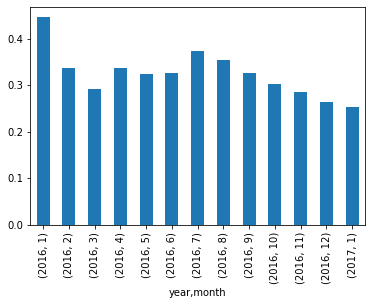

In [6]:
#Occupancy rate is decreasing

df_calendar["date"] = pd.to_datetime(df_calendar["date"])
df_calendar["month"] = pd.DatetimeIndex(df_calendar['date']).month
df_calendar["year"] = pd.DatetimeIndex(df_calendar['date']).year

df_calendar["available_01"] = df_calendar["available"].replace({'t': 0, 'f': 1})

(df_calendar.groupby(["year", "month"]).sum()["available_01"]/df_calendar.groupby(["year", "month"]).count()["listing_id"]).plot(kind='bar')


In [8]:
df_reviews = pd.read_csv('./reviews.csv')
df_reviews.info()
df_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [ ]:
#Would be nice to show a regression / trend line here

<AxesSubplot:xlabel='year,month'>

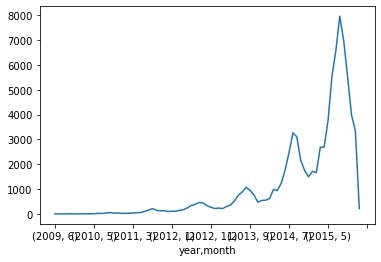

In [88]:
df_reviews["date"] = pd.to_datetime(df_reviews["date"])
df_reviews["month"] = pd.DatetimeIndex(df_reviews['date']).month
df_reviews["year"] = pd.DatetimeIndex(df_reviews['date']).year

df_reviews.groupby(['year','month']).count()['id'].plot(kind="line")

